In [1]:
#import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

#New
from sklearn.model_selection import train_test_split


In [2]:
#import dataset

import seaborn as sns
iris = sns.load_dataset('iris')

#convert from  pandas dataframe to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

#transform species to number
labels = torch.zeros(len(data),dtype=torch.long)
# labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

# using Train test split

In [3]:
#create our fake dataset
fakedata = np.tile(np.array([1,2,3,4]),(10,1)) + np.tile(10*np.arange(1,11),(4,1)).T
fakelabels = np.arange(10)>4
print(fakedata),print(' ')
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
 
[False False False False False  True  True  True  True  True]


In [4]:
#use scikitlearn to split the data
train_data,test_data,train_labels,test_labels = \
                                train_test_split(fakedata, fakelabels, test_size=.2)

# print out the sizes
print('Training data size: ' + str(train_data.shape))
print('Test data size: ' + str(test_data.shape))
print(' ')

# print out the train/test data
print('Training data: ')
print(train_data)
print(' ')

print('Test data: ')
print(test_data)


Training data size: (8, 4)
Test data size: (2, 4)
 
Training data: 
[[61 62 63 64]
 [11 12 13 14]
 [41 42 43 44]
 [51 52 53 54]
 [81 82 83 84]
 [21 22 23 24]
 [31 32 33 34]
 [91 92 93 94]]
 
Test data: 
[[101 102 103 104]
 [ 71  72  73  74]]


# Now back to the Model

In [5]:
# a function that creates the ANN model

def createANewModel():

  # model architecture
  ANNiris = nn.Sequential(
      nn.Linear(4,64),   # input layer
      nn.ReLU(),         # activation unit
      nn.Linear(64,64),  # hidden layer
      nn.ReLU(),         # activation unit
      nn.Linear(64,3),   # output units
        )

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)

  return ANNiris,lossfun,optimizer

In [8]:
# train the model
#global parameter
numepochs = 200

def trainTheModel(trainProp):
    #initialize losses
    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc = []
    
    X_train,X_test,y_train,y_test = train_test_split(data,labels,train_size= trainProp)

    #loop over epochs

    for epochi in range(numepochs):

        #forward pass and loss
        yHat = ANNiris(X_train)
        loss = lossfun(yHat,y_train)

        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #compute training accuracy
        trainAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y_train).float()).item())

        #test accuracy
        predlabels = torch.argmax(ANNiris(X_test),axis=1)
        testAcc.append(100*torch.mean((predlabels == y_test).float()).item())

    #function output
    return trainAcc,testAcc


# Test the Model by running it once

In [9]:
#create a model
ANNiris,lossfun,optimizer = createANewModel()

#train the model
# the input is the training proportion, not the test proportion

trainAcc,testAcc = trainTheModel(.8)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http:/

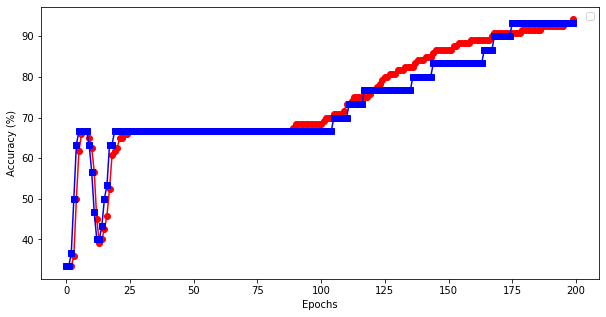

In [10]:
#plot the results
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc,'ro-')
plt.plot(testAcc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend('Train','Test')
plt.show()

# Now for the Experiment

In [11]:
trainSetSizes = np.linspace(.2,.95,10)

allTrainAcc = np.zeros((len(trainSetSizes),numepochs))
allTestAcc = np.zeros((len(trainSetSizes),numepochs))

for i in range(len(trainSetSizes)):
    #create a model
    ANNiris,lossfun,optimizer = createANewModel()

    #train the model
    trainAcc,testAcc = trainTheModel(trainSetSizes[i])

    #store the results
    allTrainAcc[i,:] = trainAcc
    allTestAcc[i,:] = testAcc
    


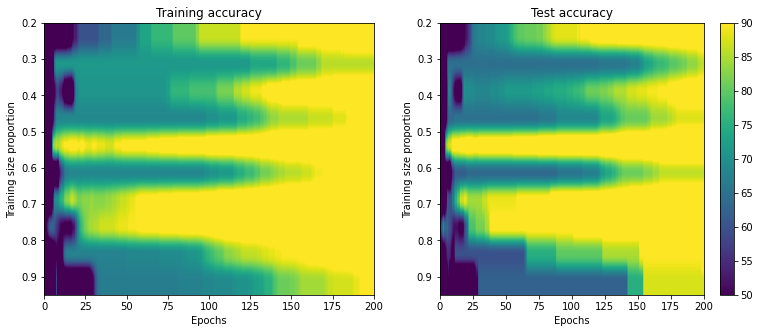

In [12]:
fig,ax = plt.subplots(1,2,figsize=(13,5))
ax[0].imshow(allTrainAcc,aspect='auto',
             vmin=50,vmax=90,extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training size proportion')
ax[0].set_title('Training accuracy')

p = ax[1].imshow(allTestAcc,aspect='auto',
                 vmin=50,vmax=90,extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training size proportion')
ax[1].set_title('Test accuracy')
fig.colorbar(p,ax=ax[1])

plt.show()
